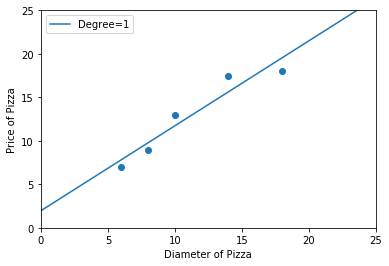

The R-squared value of Linear Regressor performing on the training data is 0.9100015964240102


In [1]:
# 输入训练样本的特征以及目标值，分别存储在变量X_train与y_train之中。
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]

# 从sklearn.linear_model中导入LinearRegression。
from sklearn.linear_model import LinearRegression
# 使用默认配置初始化线性回归模型。
regressor = LinearRegression()
# 直接以披萨的直径作为特征训练模型。
regressor.fit(X_train, y_train)

# 导入numpy并且重命名为np。
import numpy as np
# 在x轴上从0至25均匀采样100个数据点。
xx = np.linspace(0, 26, 100)
xx = xx.reshape(xx.shape[0], 1)
# 以上述100个数据点作为基准，预测回归直线。
yy = regressor.predict(xx)

# 对回归预测到的直线进行作图。
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt1, = plt.plot(xx, yy, label="Degree=1")
plt.axis([0, 25, 0, 25])
plt.xlabel('Diameter of Pizza')
plt.ylabel('Price of Pizza')
plt.legend(handles = [plt1])
plt.show()

# 输出线性回归模型在训练样本上的R-squared值。 
print('The R-squared value of Linear Regressor performing on the training data is', regressor.score(X_train, y_train))


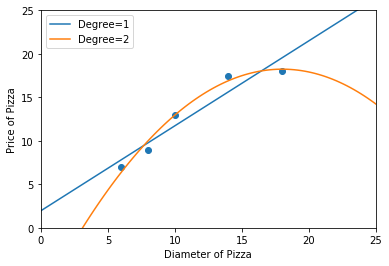

The R-squared value of Polynominal Regressor (Degree=2) performing on the training data is 0.9816421639597427


In [2]:
# 从sklearn.preproessing中导入多项式特征产生器
from sklearn.preprocessing import PolynomialFeatures
# 使用PolynominalFeatures(degree=2)映射出2次多项式特征，存储在变量X_train_poly2中。
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)

# 以线性回归器为基础，初始化回归模型。尽管特征的维度有提升，但是模型基础仍然是线性模型。
regressor_poly2 = LinearRegression()

# 对2次多项式回归模型进行训练。
regressor_poly2.fit(X_train_poly2, y_train)

# 从新映射绘图用x轴采样数据。
xx_poly2 = poly2.transform(xx)

# 使用2次多项式回归模型对应x轴采样数据进行回归预测。
yy_poly2 = regressor_poly2.predict(xx_poly2)

# 分别对训练数据点、线性回归直线、2次多项式回归曲线进行作图。
plt.scatter(X_train, y_train)

plt1, = plt.plot(xx, yy, label='Degree=1')
plt2, = plt.plot(xx, yy_poly2, label='Degree=2')

plt.axis([0, 25, 0, 25])
plt.xlabel('Diameter of Pizza')
plt.ylabel('Price of Pizza')
plt.legend(handles = [plt1, plt2])
plt.show()

# 输出2次多项式回归模型在训练样本上的R-squared值。 
print('The R-squared value of Polynominal Regressor (Degree=2) performing on the training data is', regressor_poly2.score(X_train_poly2, y_train)
)

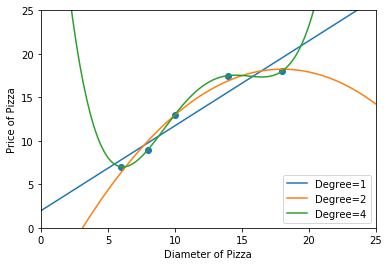

The R-squared value of Polynominal Regressor (Degree=4) performing on the training data is 1.0


In [3]:
# 从sklearn.preprocessing导入多项式特征生成器。 
from sklearn.preprocessing import PolynomialFeatures
# 初始化4次多项式特征生成器。 
poly4 = PolynomialFeatures(degree=4)

X_train_poly4 = poly4.fit_transform(X_train)

# 使用默认配置初始化4次多项式回归器。 
regressor_poly4 = LinearRegression()
# 对4次多项式回归模型进行训练。
regressor_poly4.fit(X_train_poly4, y_train)

# 从新映射绘图用x轴采样数据。
xx_poly4 = poly4.transform(xx)
# 使用4次多项式回归模型对应x轴采样数据进行回归预测。
yy_poly4 = regressor_poly4.predict(xx_poly4)

# 分别对训练数据点、线性回归直线、2次多项式以及4次多项式回归曲线进行作图。
plt.scatter(X_train, y_train)
plt1, = plt.plot(xx, yy, label='Degree=1')
plt2, = plt.plot(xx, yy_poly2, label='Degree=2')

plt4, = plt.plot(xx, yy_poly4, label='Degree=4')
plt.axis([0, 25, 0, 25])
plt.xlabel('Diameter of Pizza')
plt.ylabel('Price of Pizza')
plt.legend(handles = [plt1, plt2, plt4])
plt.show()

print('The R-squared value of Polynominal Regressor (Degree=4) performing on the training data is',regressor_poly4.score(X_train_poly4, y_train)
)

In [4]:
# 准备测试数据。
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]


In [5]:
# 使用测试数据对线性回归模型的性能进行评估。
regressor.score(X_test, y_test)

0.809726797707665

In [6]:
# 使用测试数据对2次多项式回归模型的性能进行评估。
X_test_poly2 = poly2.transform(X_test)
regressor_poly2.score(X_test_poly2, y_test)



0.8675443656345073

In [7]:
# 使用测试数据对4次多项式回归模型的性能进行评估。
X_test_poly4 = poly4.transform(X_test)
regressor_poly4.score(X_test_poly4, y_test)

0.8095880795766845

In [8]:
# 从sklearn.linear_model中导入Lasso。
from sklearn.linear_model import Lasso

# 从使用默认配置初始化Lasso。
lasso_poly4 = Lasso()
# 从使用Lasso对4次多项式特征进行拟合。
lasso_poly4.fit(X_train_poly4, y_train)

# 对Lasso模型在测试样本上的回归性能进行评估。
print(lasso_poly4.score(X_test_poly4, y_test))


0.8388926873604382


D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7226030013118618, tolerance: 0.009720000000000001
  positive)


In [9]:
# 输出Lasso模型的参数列表。
print(lasso_poly4.coef_)


[ 0.00000000e+00  0.00000000e+00  1.17900534e-01  5.42646770e-05
 -2.23027128e-04]


In [10]:
# 回顾普通4次多项式回归模型过拟合之后的性能。
print(regressor_poly4.score(X_test_poly4, y_test))


0.8095880795766845


In [11]:
# 回顾普通4次多项式回归模型的参数列表。
print(regressor_poly4.coef_)


[[ 0.00000000e+00 -2.51739583e+01  3.68906250e+00 -2.12760417e-01
   4.29687500e-03]]


In [12]:
# 输出上述这些参数的平方和，验证参数之间的巨大差异。
print(np.sum(regressor_poly4.coef_ ** 2))


647.3826457369564


In [13]:
# 从sklearn.linear_model导入Ridge。
from sklearn.linear_model import Ridge
# 使用默认配置初始化Riedge。
ridge_poly4 = Ridge()


In [14]:
# 使用Ridge模型对4次多项式特征进行拟合。
ridge_poly4.fit(X_train_poly4, y_train)

# 输出Ridge模型在测试样本上的回归性能。
print(ridge_poly4.score(X_test_poly4, y_test))


0.8374201759366575


In [15]:
# 输出Ridge模型的参数列表，观察参数差异。
print(ridge_poly4.coef_)


[[ 0.         -0.00492536  0.12439632 -0.00046471 -0.00021205]]


In [16]:

# 计算Ridge模型拟合后参数的平方和。
print(np.sum(ridge_poly4.coef_ ** 2))


0.015498965203571717
